In [130]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import os
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from decomposer import decompose

# Load Data
shap_vals = np.load("first_recording_shap_vals.npy")
shap_vals = shap_vals[0] # IM JUST GONNA ASSUME THAT BOTH THE LEADS ARE JUST REPEATED IN EACH ROW ):
shap_vals = shap_vals.reshape((2, 5000))
print(shap_vals.shape)
shaps_df = pd.DataFrame(shap_vals, index=['Lead1', 'Lead2'])

shaps_df

(2, 5000)


,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
Lead1,-0.000215,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.000518,-0.000174,-0.000207,0.0
Lead2,0.000000,0.0,-0.000149,-0.000246,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0


In [30]:
def get_patient_data(path=None):
    dir_path = '../../../../../../local1/CSE_XAI/small_data/'
    if path is None:
        path = os.listdir(dir_path)[0]
    
    patient_X = np.empty((2, 5000))
    jsonFile = open(dir_path + path, 'r')
    fileContents = json.load(jsonFile)

    # digging into the dictionaries to get lead data
    lead_1_samples = fileContents['samples']
    lead_2_samples = fileContents['extraLeads'][0]['samples']
    # Crop the data to 5000 data points (5 seconds).
    patient_X[0,:] = lead_1_samples[0:5000]
    patient_X[1,:] = lead_2_samples[0:5000]

    return patient_X

In [ ]:
decompose(get_patient_data())

[(-2.0, 2.0)]

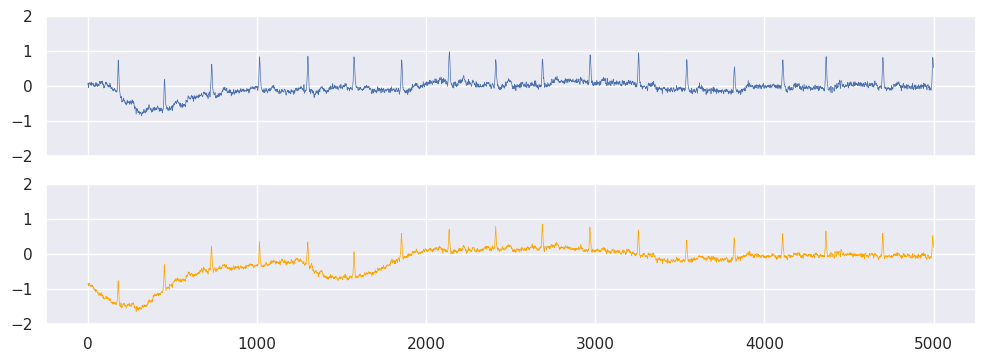

In [142]:
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(12,4))
sns.lineplot(get_patient_data()[0], ax=axes[0], linewidth = 0.5).set(ylim=[-2,2])
sns.lineplot(get_patient_data()[1], ax=axes[1], color='orange', linewidth = 0.5).set(ylim=[-2,2])

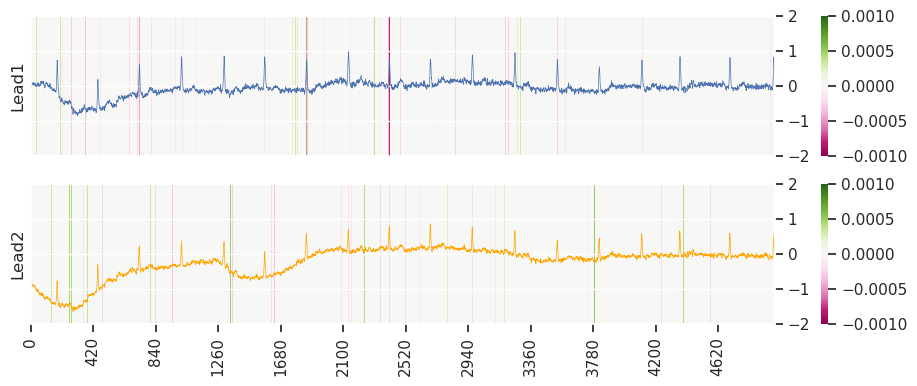

In [145]:
# Plot

fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(12,4))
plt.tick_params(bottom='on')

sns.heatmap(np.asarray(shaps_df.loc['Lead1']).reshape(1, 5000), cmap="PiYG", ax=axes[0], vmin=-0.001, vmax=0.001, yticklabels=False)
sns.heatmap(np.asarray(shaps_df.loc['Lead2']).reshape(1, 5000), cmap="PiYG", ax=axes[1], vmin=-0.001, vmax=0.001, yticklabels=False)

axes[0].set(ylabel="Lead1")
axes[1].set(ylabel="Lead2")

ax_l1 = axes[0].twinx()
ax_l2 = axes[1].twinx()

sns.lineplot(get_patient_data()[0], ax=ax_l1, linewidth = 0.5).set(ylim=[-2,2])
sns.lineplot(get_patient_data()[1], ax=ax_l2, color='orange', linewidth = 0.5).set(ylim=[-2,2])

axes[0].grid(False)
axes[1].grid(False)
axes[0].set_xticks(axes[0].get_xticks()[::2])
axes[1].set_xticks(axes[1].get_xticks()[::2]) 
